# Ứng dụng Neural Network trong nhận diện ảnh. (có hidden layer)

## Yêu cầu:
1. Dataset: là tập ảnh có mèo và không có mèo, có mèo được gán nhãn là `y=1`, không có mèo được gán nhãn là `y=0`.
2. Sử dụng Neural network, một hidden layer sử dụng hàm kích hoạt là `ReLU` và output layer sử dụng hàm `softmax`.


## Cài đặt thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
import scipy
from PIL import Image
from scipy import ndimage


## Load dữ liệu 

In [2]:
def load_dataset():
    train_dataset = h5py.File('./data/cat/train_catvnoncat.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('./data/cat/test_catvnoncat.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(train_dataset["list_classes"][:])
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

X_train, y_train, X_test, y_test, classes = load_dataset()

In [3]:
print("X_train", X_train.shape)
print("y_train:\n", y_train)
print("X_test:", X_test.shape)
print("y_test: \n", y_test)

X_train (209, 64, 64, 3)
y_train:
 [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
X_test: (50, 64, 64, 3)
y_test: 
 [[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]


## Hiển thị các bức ảnh 

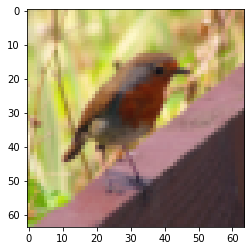

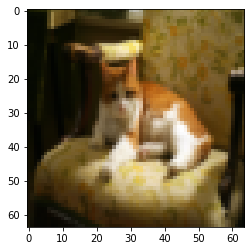

In [4]:
plt.imshow(X_train[10])
plt.show()
plt.imshow(X_train[7])


## Đưa dữ liệu về dạng chuẩn
Đưa mỗi ảnh có kích thước `(64,64,3)` trải phẳng về vector có kích thước `(64*64*3,1)`. Sau đó, chuẩn hóa dữ liệu, cuối cùng ta được tập X_train, X_test (chuẩn hóa chia mỗi pixel cho giá trị `255`)

In [5]:
num_train, heigt_train, weight_train, dimen1 = X_train.shape
num_test, heigt_test, weight_test, dimen2 = X_test.shape
X_train_flatten = X_train.reshape(-1,X_train.shape[0])
print(X_train_flatten.shape)
X_test_flatten = X_test.reshape(-1,X_test.shape[0])
print(X_test_flatten.shape)

(12288, 209)
(12288, 50)


In [6]:
X_train = X_train_flatten/ 255
X_test =  X_test_flatten/255
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12288, 209)
(12288, 50)
(1, 209)
(1, 50)


In [7]:
X_train = X_train.T
X_test =  X_test.T
print(X_train.shape)
print(X_test.shape)
y_train = y_train.reshape(X_train.shape[0],)
print(y_train)
y_test = y_test.reshape(X_test.shape[0],)
print(y_test)

(209, 12288)
(50, 12288)
[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0]


# Xây dựng multilayer neural network với 1 tầng ẩn.
1. Xác định kiến trúc của mô hình: số đặc trưng đầu vào, số kết quả đầu ra, cấu trúc của mỗi lớp, số lượng tham số,...
2. Khởi tạo giá trị ban đầu của các tham số của mô hình.
3. Vòng lặp: Tính hàm loss (lan truyền thẳng), Tính gradient dựa trên giá trị hàm loss, Cập nhật giá trị cho các tham số gradient tính được.
4. Xây dựng các bước độc lập, tổng hợp thành `model()`.

## Hàm kích hoạt softmax_stable

In [8]:
def softmax_stable(Z):
    e_Z = np.exp(Z-np.max(Z, axis = 1, keepdims = True))
    A = e_Z / (e_Z.sum(axis = 1, keepdims = True))
    
    return A
# test
Z = np.array([[1, 2, 3],[100, 1, 2]])
print(softmax_stable(Z))

[[9.00305732e-02 2.44728471e-01 6.65240956e-01]
 [1.00000000e+00 1.01122149e-43 2.74878501e-43]]


## Khởi tạo ma trận trọng số W (W1, W2) và bias (b1, b2)

In [9]:
def mlp_init(d0, d1, d2):
    """
    d0 : dimension of input data d0 = 64*64*3
    d1 : number of hidden unit   d1 = 5
    d2 : number of output unit = number of classes, d2 =2 (0 or 1)
    W1 : matrix weight size (64*64*3, 5)
    W2 : matrix weight size (5,1)
    b1 : bias 1 (5,) , b2 bias 2 (1)
    """
    W1 = 0.01 * np.random.randn(d0, d1)
    b1 = np.zeros(d1)
    W2 = 0.01 * np.random.randn(d1, d2)
    b2 = np.zeros(d2)
    return W1, b1, W2, b2

## Hàm dự đoán

In [10]:
def mlp_predict(X, W1, b1, W2, b2):
    """
    X: data matrix size (number_examples = N = 209, 64*64*3)
    W1 : matrix weight size (64*64*3, 5)
    W2 : matrix weight size (5,1)
    """
    Z1 = X.dot(W1) + b1 # shape(N, d1)
    A1 = np.maximum(Z1, 0) # shape (N, d1)
    Z2 = A1.dot(W2) + b2 #shape (N,d2=2)
    
    return np.argmax(Z2, axis = 1)
# test
d0 = X_train.shape[1]
d1 = 5
d2 = 2
W1, b1, W2, b2 = mlp_init(d0, d1, d2)
A = mlp_predict(X_train, W1, b1, W2, b2)
print(A)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


## Hàm mất mát

In [11]:
def crossentropy_loss(y_predict,y):
    """
    y_predict : a numpy array of shape (Npoints = 209, nClasses =2)
    y: a numpy array of shape (Npoints = 209)
    """
    id0 = range(y_predict.shape[0])
    
    return -np.mean(np.log(y_predict[id0, y]))
# test
y_predict = np.array([[0.3,0.7],[0.8, 0.2]])
id0 = range(y_predict.shape[0])
print(id0)
y = np.array([1, 1])
print(y_predict[id0 ,y])

range(0, 2)
[0.7 0.2]


## Lan truyền tiến và lan truyền ngược

In [30]:
def mlp_fit(X, y, W1, b1, W2, b2, num_iterations = 2000, learning_rate = 0.05):
    """
    X: matrix data size (N = 209 ,d0 = 64*64*3)
    y: matrix label shape(N)
    W1 : (d0 = 64*64*3, d1 = 5)
    W2 : (d1 = 5, d2 =2)
    b1 : bias shape(5)
    b2 : bias shape(2)
    """
    cost_hist = []
    N = X.shape[0] 
    for i in range(num_iterations):
        # feedforward
        Z1 = X.dot(W1) + b1     # shape (N = 209, d1 = 5)
        A1 = np.maximum(Z1, 0)  # shape (N = 209, d1 = 5)
        Z2 = A1.dot(W2)         # shape (N = 209, d2 = 2)
        y_predict = softmax_stable(Z2) # shape(N = 209, d2 =2)
        if i %100 == 0:
            cost = crossentropy_loss(y_predict,y)
            print("iter: {:d}, cost: {:f}".format(i,cost))
            cost_hist.append(cost)
        
        #back propagation
        id0 = range(y_predict.shape[0])
        y_predict[id0, y] -= 1
        E2 = y_predict/N                # shape(N = 209, d2 = 2)
        dW2 = np.dot(A1.T, E2)
        db2 = np.sum(E2, axis = 0)
        E1  = np.dot(E2, W2.T)
        E1[Z1 <= 0] = 0
        dW1 = np.dot(X.T, E1)
        db1 = np.sum(E1, axis = 0)
        
        #gradient descent
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        
    return W1, b1, W2, b2, cost_hist
    
        

In [33]:
d0 = X_train.shape[1]
print(d0)
d1 = 5
d2 = 2
W1, b1, W2, b2 = mlp_init(d0, d1, d2)
W1, b1, W2, b2, cost_hist = mlp_fit(X_train, y_train, W1, b1, W2, b2, num_iterations = 2000, learning_rate = 0.005)
y_pred_train = mlp_predict(X_train, W1, b1, W2, b2)
acc_train = 100*np.mean(y_pred_train == y_train)
print("Traning accuracy: {:.2f} %".format(acc_train))
y_pred_test = mlp_predict(X_test, W1, b1, W2, b2)
acc_test = 100*np.mean(y_pred_test == y_test)
print("Test accuracy: {:.2f} %".format(acc_test))
print("cost_hist:",cost_hist)

12288
iter: 0, cost: 0.695342
iter: 100, cost: 0.637496
iter: 200, cost: 0.627524
iter: 300, cost: 0.614126
iter: 400, cost: 0.601057
iter: 500, cost: 0.587549
iter: 600, cost: 0.572296
iter: 700, cost: 0.558431
iter: 800, cost: 0.544583
iter: 900, cost: 0.530515
iter: 1000, cost: 0.517310
iter: 1100, cost: 0.506908
iter: 1200, cost: 0.502303
iter: 1300, cost: 0.485657
iter: 1400, cost: 0.477932
iter: 1500, cost: 0.480438
iter: 1600, cost: 0.468230
iter: 1700, cost: 0.480866
iter: 1800, cost: 0.437968
iter: 1900, cost: 0.448759
Traning accuracy: 78.47 %
Test accuracy: 64.00 %
cost_hist: [0.6953415271539048, 0.6374955332220577, 0.6275240189862737, 0.6141263556806611, 0.6010574025134873, 0.5875489559366011, 0.5722956532514937, 0.5584309298128823, 0.5445834067196744, 0.5305148706842776, 0.5173095083944367, 0.5069080894517902, 0.502303125585828, 0.48565717165502187, 0.4779316925951517, 0.4804381890697462, 0.4682300691253425, 0.4808658794075139, 0.4379680506099688, 0.4487590836622733]


In [7]:
import numpy as np
y_predict = np.array([[0.3,0.7],[0.8, 0.2]])
id0 = range(y_predict.shape[0])
y = np.array([1, 1])
print(y_predict[id0 ,y])
y_predict[id0 ,y] -= 1
print(y_predict)

[0.7 0.2]
[[ 0.3 -0.3]
 [ 0.8 -0.8]]
